In [4]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [5]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

## Regression Model ##

In [3]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter('x', 'y')
    plots.title('What We Get to See')

    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter('x', 'y', fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

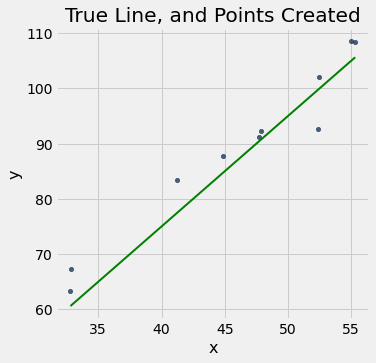

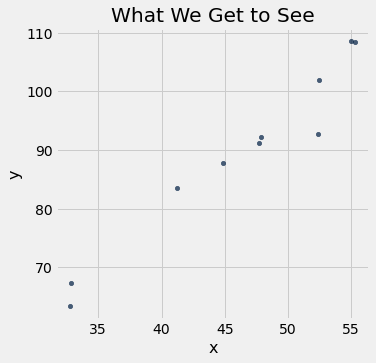

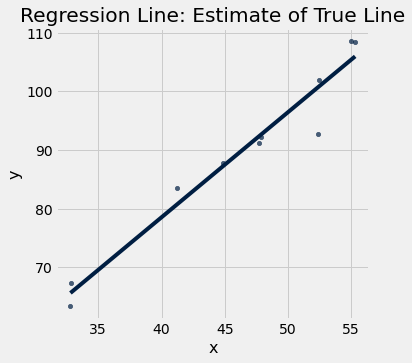

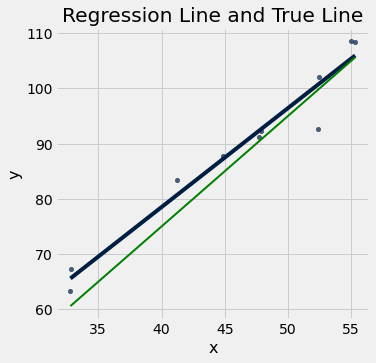

In [6]:
draw_and_compare(2, -5, 10)

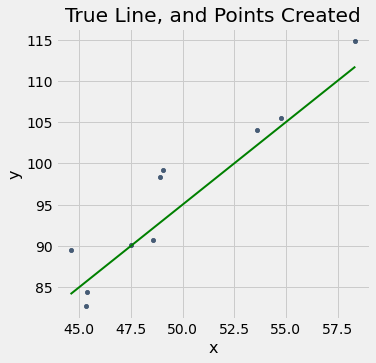

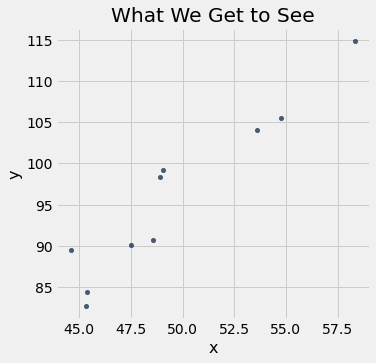

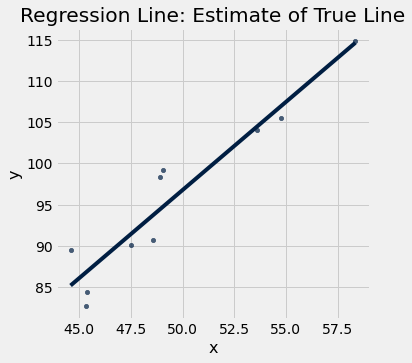

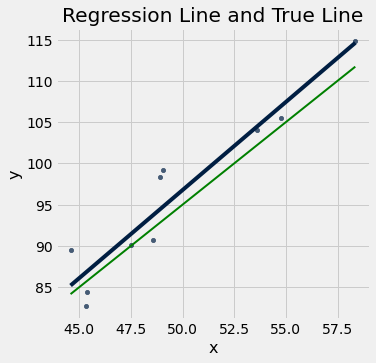

In [7]:
draw_and_compare(2, -5, 10)

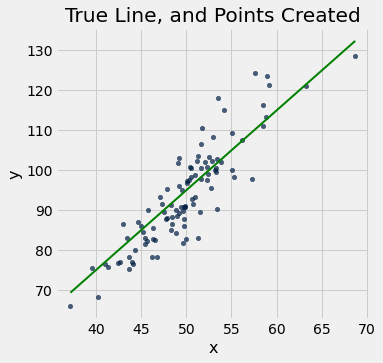

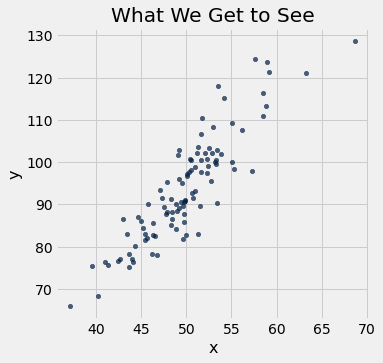

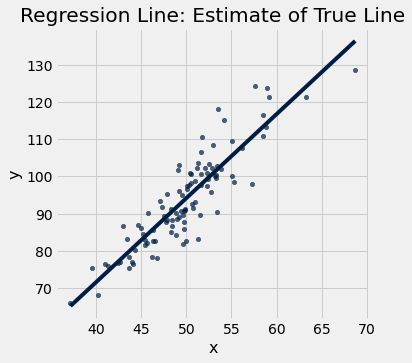

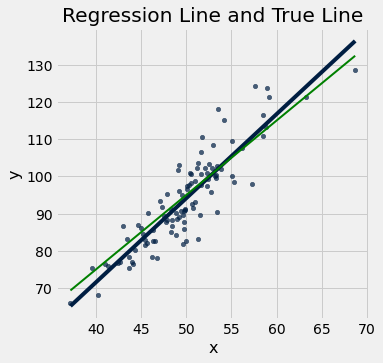

In [8]:
draw_and_compare(2, -5, 100)

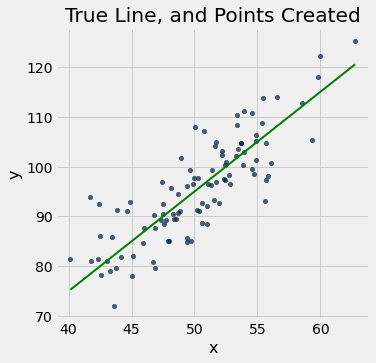

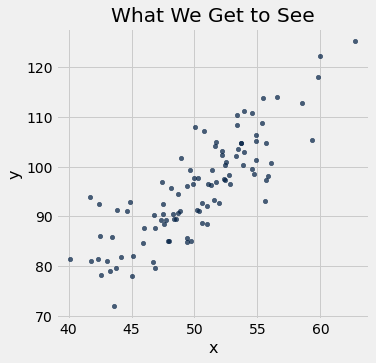

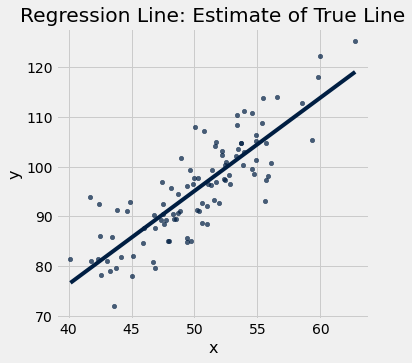

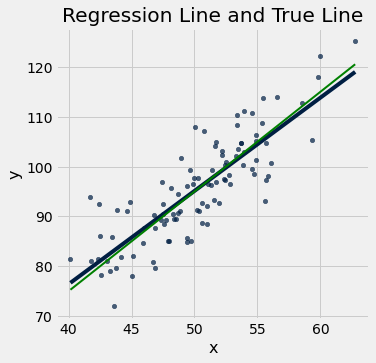

In [9]:
draw_and_compare(2, -5, 100)

## Prediction ##

In [10]:
births = Table.read_table('data/baby.csv')

In [11]:
births = Table.read_table('data/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [12]:
# Preterm and postterm pregnancy cutoffs, according to the CDC
37 * 7, 42 * 7

(259, 294)

In [17]:
8*16

128

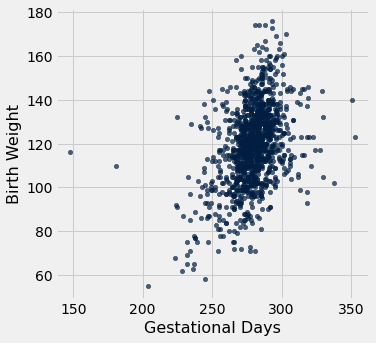

In [13]:
births.scatter('Gestational Days', 'Birth Weight')

In [18]:
births = births.where('Gestational Days', are.between(225, 325))

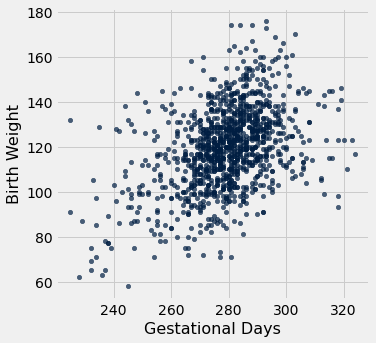

In [19]:
births.scatter('Gestational Days', 'Birth Weight')

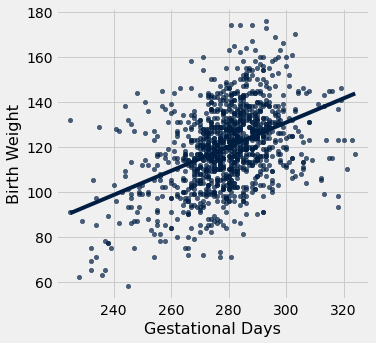

In [20]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [21]:
correlation(births, 'Gestational Days', 'Birth Weight')

0.4229511845242399

In [22]:
def prediction_at(t, x, y, x_value):
    '''
    t - table
    x - label of x column
    y - label of y column
    x_value - the x value for which we want to predict y
    '''
    return slope(t, x, y) * x_value + intercept(t, x, y)

In [26]:
prediction_at_300 = prediction_at(births, 'Gestational Days', 'Birth Weight', 300)
prediction_at_300

130.8095167424877

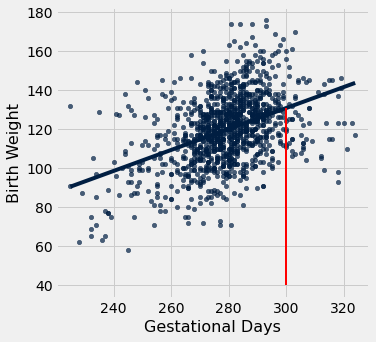

In [27]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='red', lw=2);

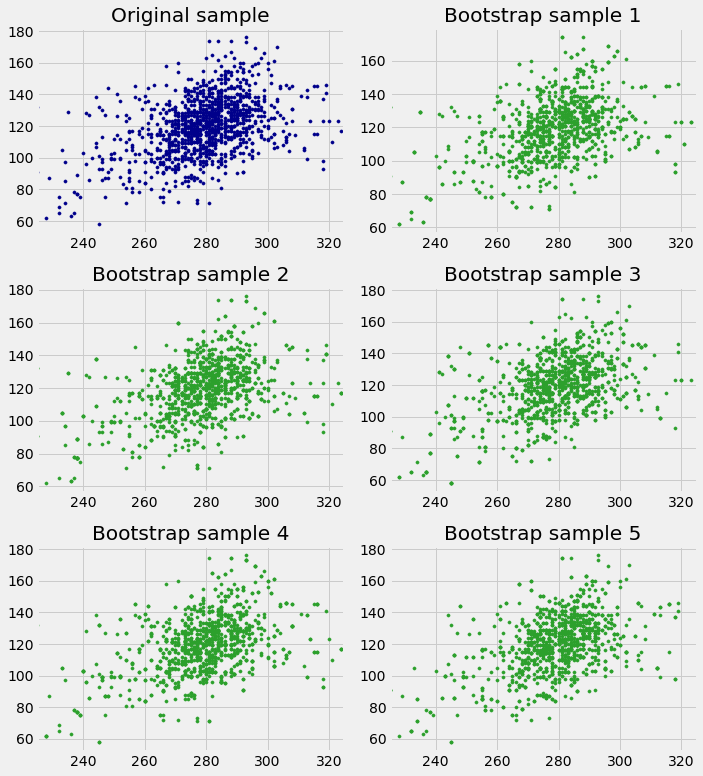

In [25]:
# You don't need to understand the plotting code in this cell,
# but you should understand the figure that comes out.

# we want to infer something about all babies born in the US
# so our babies table, will be a sample of the population
# since we don't have access to data for all babies born in the US, for all time, or
# a certain time period
plots.figure(figsize=(10, 11))
plots.subplot(3, 2, 1)
plots.scatter(births[1], births[0], s=10, color='darkblue')
plots.xlim([225, 325])
plots.title('Original sample')

for i in np.arange(1, 6, 1):
    plots.subplot(3,2,i+1)
    resampled = births.sample()
    plots.scatter(resampled.column('Gestational Days'), resampled.column('Birth Weight'), s=10, color='tab:green')
    plots.xlim([225, 325])
    plots.title('Bootstrap sample '+str(i))
plots.tight_layout()

Predicted y from bootstramp sample was 131.2808431104874
Predicted y from bootstramp sample was 131.06989659193428
Predicted y from bootstramp sample was 131.53271204044057
Predicted y from bootstramp sample was 130.8899495987694


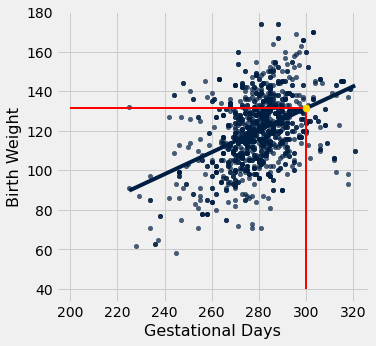

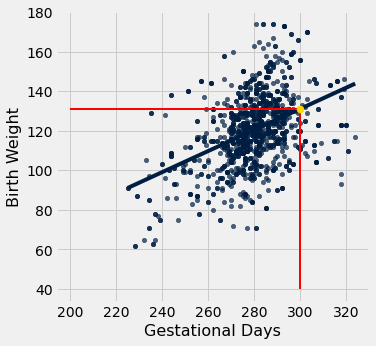

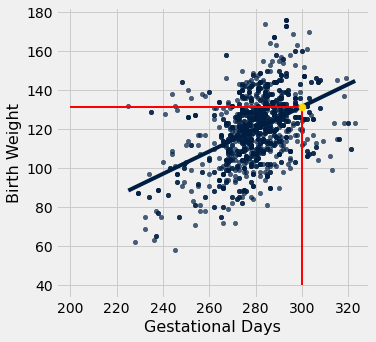

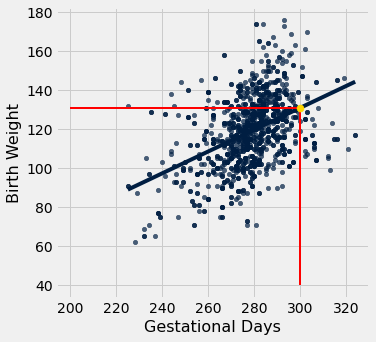

In [28]:
for i in np.arange(4):
    resample = births.sample()
    predicted_y = prediction_at(resample, 'Gestational Days', 'Birth Weight', 300)
    print('Predicted y from bootstramp sample was', predicted_y)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=50, zorder=3);
    plots.plot([x, x], [40, predicted_y], color='red', lw=2);
    plots.plot([200, x], [predicted_y, predicted_y], color='red', lw=2);

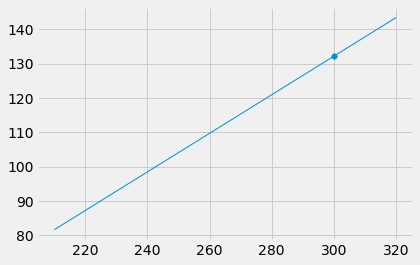

In [35]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

resample = births.sample()
a = slope(resample, 'Gestational Days', 'Birth Weight')
b = intercept(resample, 'Gestational Days', 'Birth Weight')
lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

line = lines.row(0)
line
plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)

plots.scatter(300, line.item('at 300'), s=30, zorder=3)

In [36]:
line

Row(slope=0.5617709763180878, intercept=-36.32197631225257, at 210=81.64992871454587, at 300=132.20931658317375, at 320=143.44473610953554)

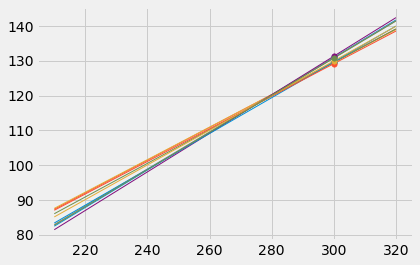

In [29]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10): # 10 bootstrap samples 
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

# below we plot 10 best fit lines based one our 10 bootstrap samples

In [38]:
lines = Table(['slope','intercept', 'at 291', 'at 300', 'at 309'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 291 + b, a * 300 + b, a * 309 + b])
lines


slope,intercept,at 291,at 300,at 309
0.491393,-17.1248,125.87,130.293,134.716
0.478875,-14.1434,125.209,129.519,133.829
0.570665,-39.0562,127.007,132.143,137.279
0.566009,-37.154,127.555,132.649,137.743
0.5665,-39.1265,125.725,130.823,135.922
0.568486,-39.1046,126.325,131.441,136.558
0.513164,-23.9769,125.354,129.972,134.591
0.529127,-28.9381,125.038,129.8,134.562
0.542301,-31.8662,125.943,130.824,135.705
0.545844,-32.541,126.299,131.212,136.125


In [42]:
291/7, 307/7

(41.57142857142857, 43.857142857142854)

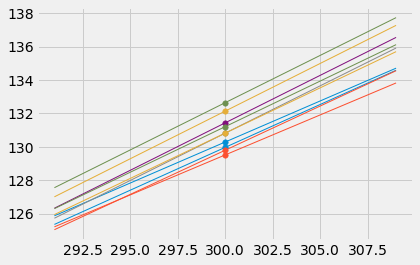

In [39]:
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

## Confidence Interval for Prediction ##

In [43]:
def bootstrap_prediction(t, x, y, new_x, repetitions=1000):
    """ 
    Makes a 95% confidence interval for the prediction at new_x, using
    linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """

    # Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')') 

Approximate 95%-confidence interval for height of true line:
128.89597046813276 132.6670173812147 (width = 3.771046913081932 )


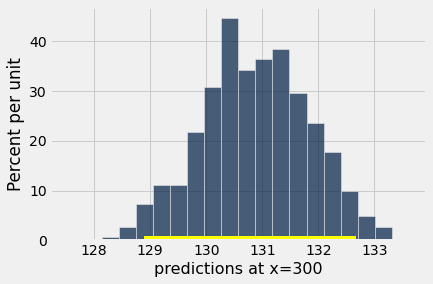

In [44]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

## Predictions at Different Values of X

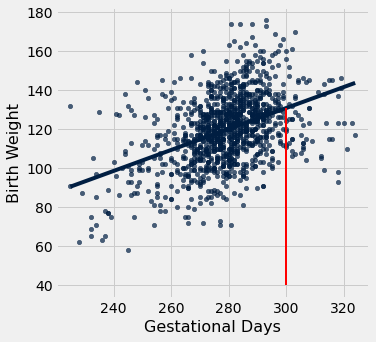

In [45]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='red', lw=2);

Approximate 95%-confidence interval for height of true line:
76.65637500345156 88.02306514277122 (width = 11.366690139319658 )


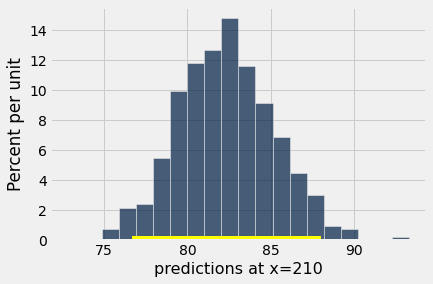

In [46]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 210)

Approximate 95%-confidence interval for height of true line:
119.05604055572479 121.02397937930068 (width = 1.9679388235758921 )


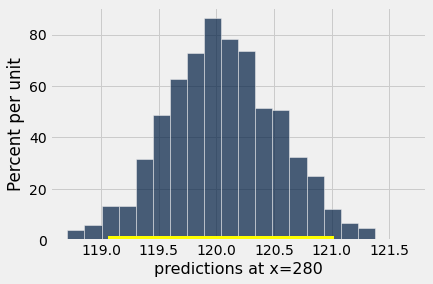

In [47]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

In [48]:
np.mean(births.column('Gestational Days'))

279.1101549053356

## Inference for the Slope ##

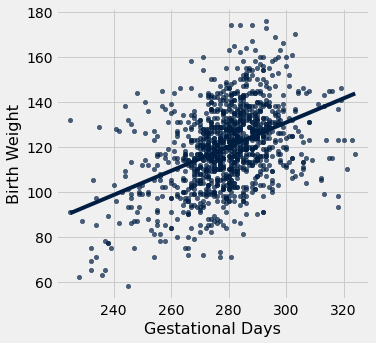

In [49]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [50]:
slope(births, 'Gestational Days', 'Birth Weight')

0.5378453676679036

In [52]:
def bootstrap_slope(t, x, y, repetitions=5000):
    """ 
    Makes a 95% confidence interval for the slope of the prediction line
    for y, using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(left, 'to', right)

Slope of regression line: 0.5378453676679036
Approximate 95%-confidence interval for the slope of the true line:
0.46093703226956884 to 0.6192650470218651


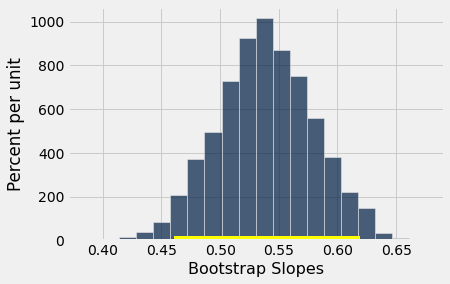

In [53]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight', 2500)

## Rain on the Regression Parade

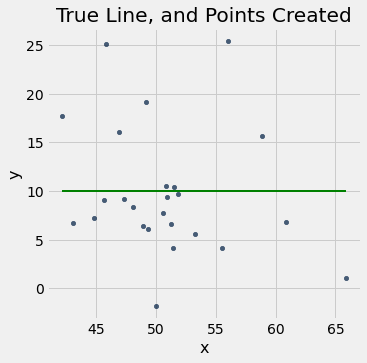

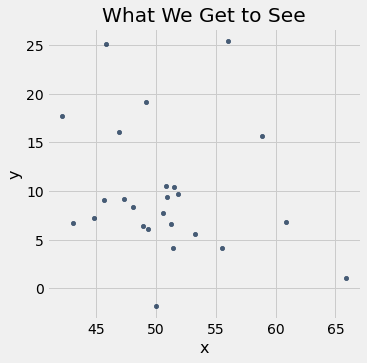

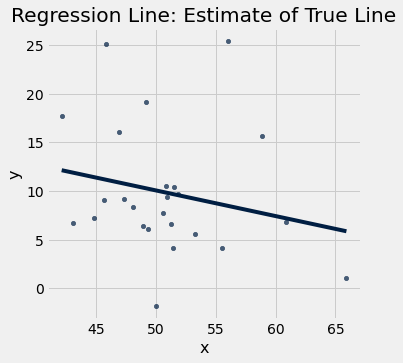

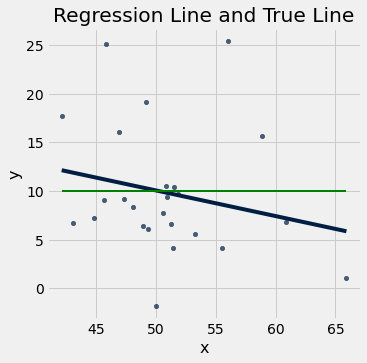

In [54]:
draw_and_compare(0, 10, 25)

**Null Hypothesis.** Slope of true line = 0.

**Alternative Hypothesis.** Slope of true line is not 0.

In [55]:
slope(births, 'Maternal Age', 'Birth Weight')

0.09514223729834466

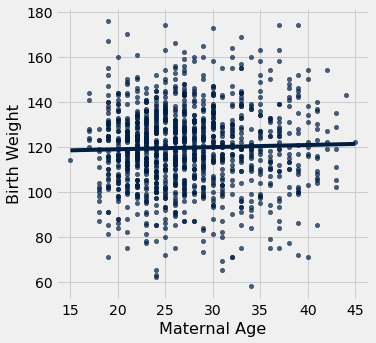

In [56]:
births.scatter('Maternal Age', 'Birth Weight', fit_line=True)

Slope of regression line: 0.09514223729834466
Approximate 95%-confidence interval for the slope of the true line:
-0.09535590051979773 to 0.27697534524835604


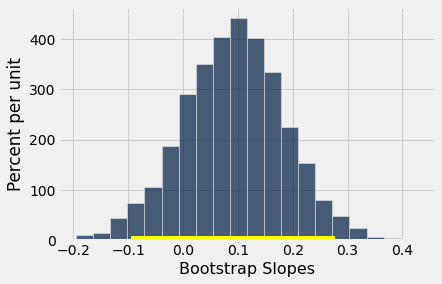

In [57]:
bootstrap_slope(births, 'Maternal Age', 'Birth Weight', 2500)

## Nonlinear regression

In [58]:
cars = Table.read_table('data/cars2016.csv')
cars = cars.select('name', 'city_mpg', 'highway_mpg', 'engine_torque')
cars.show(3)

name,city_mpg,highway_mpg,engine_torque
2009 Audi A3 3.2,18,25,236
2009 Audi A3 2.0 T AT,22,28,207
2009 Audi A3 2.0 T,21,30,207


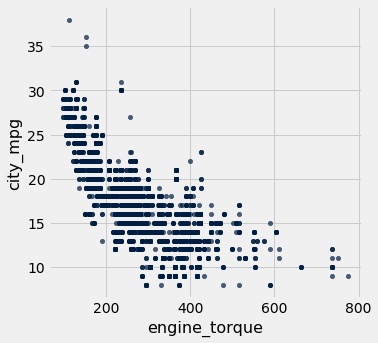

In [59]:
cars.scatter('engine_torque', 'city_mpg')

In [60]:
def compute_car_quadratic_mse(a, b, c):
    x = cars.column('engine_torque')
    y = cars.column('city_mpg')
    quadratic_prediction = a * x**2 + b * x + c
    quadratic_mse = np.mean((y - quadratic_prediction) ** 2)
    return np.sqrt(quadratic_mse)

In [62]:
result = minimize(compute_car_quadratic_mse)
result

array([ 9.10264659e-05, -8.97235299e-02,  3.40608763e+01])

In [63]:
a = result.item(0)
b = result.item(1)
c = result.item(2)
x = cars.column('engine_torque')
cars = cars.with_column(
    'Quadratic city mpg prediction', a * x**2 + b*x + c
)

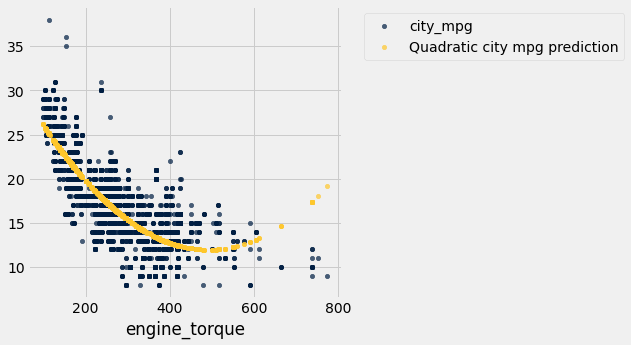

In [64]:
cars.select('engine_torque', 'city_mpg', 'Quadratic city mpg prediction').scatter('engine_torque')

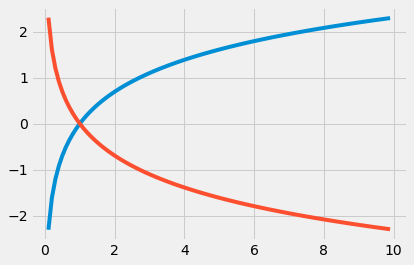

In [65]:
x_ = np.arange(.1, 10, .1)
y_ = np.log(x_)
plots.plot(x_, y_)
plots.plot(x_, -y_)

In [66]:
def compute_car_log_mse(a, b, c):
    x = cars.column('engine_torque')
    y = cars.column('city_mpg')
    log_prediction = a * np.log(b * x) + c
    log_mse = np.mean((y - log_prediction) ** 2)
    return np.sqrt(log_mse)

In [67]:
result = minimize(compute_car_log_mse)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


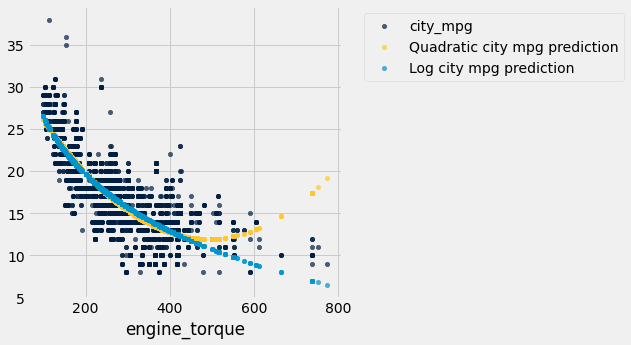

In [68]:
a = result.item(0)
b = result.item(1)
c = result.item(2)
x = cars.column('engine_torque')
cars = cars.with_column(
    'Log city mpg prediction', a * np.log(b*x) + c
)
cars.select(
    'engine_torque', 'city_mpg', 'Quadratic city mpg prediction', 'Log city mpg prediction'
).scatter('engine_torque')

## Multiple regression

In [ ]:
births.show(3)

In [ ]:
correlation(births, 'Birth Weight', 'Gestational Days')

In [ ]:
correlation(births, 'Birth Weight', 'Maternal Age')

In [ ]:
correlation(births, 'Birth Weight', 'Maternal Height')

What if we try to predict birth weight from gestational days and maternal height?

In [ ]:
def multiple_regression_rmse(maternal_height_mult, gest_days_mult, intercept):
    gest_days = births.column('Gestational Days')
    maternal_height = births.column('Maternal Height')
    y = births.column('Birth Weight')
    prediction = (gest_days_mult * gest_days) + (maternal_height_mult * maternal_height) + intercept
    mse = np.mean((y - prediction) ** 2)
    return np.sqrt(mse)

In [ ]:
best = minimize(multiple_regression_rmse)
best

In [ ]:
# This means that our prediction for birth weight is:
# 1.658 * (maternal height in inches) + 0.52 * (number of gestational days) +  - 131.5 ounces

In [ ]:
multiple_regression_rmse(best.item(0), best.item(1), best.item(2))

In [ ]:
# Remember, RMSE for linear prediction = SD of residuals
np.std(residuals(births, 'Gestational Days', 'Birth Weight'))

In [ ]:
# Remember, RMSE for linear prediction = SD of residuals
np.std(residuals(births, 'Maternal Height', 'Birth Weight'))